# **Regression - Delta t7**

Difference of days between last information and consultation

In this section, two machine learning models will be used to predict the `delta_t7` column, Random Forest Regressor and XGBoost Regressor.

## **Reading the data**

Reading the data from SP and other states.

We can see that we still have some missing values in both datasets, but the column `DTRECIDIVA` will be dropped, as well the `IDADE` column, because the column `FAIXAETAR` will be used, both have information about the age of the patients. 

The columns `delta_t4`, `delta_t5` and `delta_t6`, can be used as a label in a future analysis, so they will not be as features of the created models.

In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')
df_fora = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

(806402, 94)
(62317, 94)


In [ ]:
df_SP.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    717377
delta_t6      717377
delta_t5      717377
delta_t4      717377
IDADE              1
TRATAMENTO         0
dtype: int64

In [ ]:
df_fora.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    57799
delta_t6      57799
delta_t5      57799
delta_t4      57799
NAOTRAT           0
LOCALTNM          0
dtype: int64

## **Training and testing split**

To define the columns that will be used as features and the label, the process will be similar to the one used previously. 

For the features we will not use some columns of the data: `UFRESID`, because we already have the division between SP and other states in the two datasets. The date columns will also be removed, `DTCONSULT, DTDIAG, DTTRAT, DTRECIDIVA, DTULTINFO`, because we already have the difference in days in other columns. 

It was chosen to keep the column `FAIXAETAR`, so we will not use the `IDADE`. Regarding `PERDASEG`, it has already been discussed in the [classification - ob section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Classifiers.html#Reading-the-data).

The columns `CONSDIAG, TRATCONS, DIAGTRAT` contain the same information as the `delta_t1, delta_t2, delta_t3`. Finally, the other columns contained in the list `list_drop` are possible labels, so they will not be used as features for machine learning models.

In [ ]:
list_drop = ['UFRESID', 'DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTRECIDIVA', 'DTULTINFO',
             'IDADE', 'PERDASEG', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'delta_t4',
             'delta_t5', 'delta_t6', 'delta_t8', 'delta_t9', 'ob', 'ano_ob',
             'ob_com_rec', 'ob_sem_rec', 'vivo_com_rec', 'vivo_sem_rec', 'ULTINFO']

lb = 'delta_t7'

Again we will use the function created to perform the division of the data in training and testing, `get_train_test`. It is only necessary to pass the dataframe that will be used, a list with the columns that will not be used and a string with the name of the column that will be the label.

> To see the complete function go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models).

**SP**

In [ ]:
X_trainSP, X_testSP, y_trainSP, y_testSP = get_train_test(df_SP, list_drop, lb)

X_train = (604801, 70), X_test = (201601, 70)
y_train = (604801,), y_test = (201601,)


**Other states**

In [ ]:
X_trainFora, X_testFora, y_trainFora, y_testFora = get_train_test(df_fora, list_drop, lb)

X_train = (46737, 70), X_test = (15580, 70)
y_train = (46737,), y_test = (15580,)


## **Encoder and normalization**

After dividing the data into training and testing it is necessary to preprocess the training data, for this we will use the function `train_preprocessing`, it returns the data encoded (columns that are strings) and normalized. Training data is required for the function.

> See the complete function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models).

**SP**

In [ ]:
X_trainSP_enc, enc_SP, norm_SP = train_preprocessing(X_trainSP, normalizer='StandardScaler')

**Other states**

In [ ]:
X_trainFora_enc, enc_fora, norm_fora = train_preprocessing(X_trainFora, normalizer='StandardScaler')

## **Training and evaluation the machine learning models**

To preprocess the test data we will usa the function `test_preprocessing`, passing the test data and the encoder and normalizer, trained to the training data, as parameters.

> See the complete function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models)

In [ ]:
X_testSP_ = test_preprocessing(X_testSP, enc_SP, norm_SP)
X_testFora_ = test_preprocessing(X_testFora, enc_fora, norm_fora)

After dividing the data into training and testing, using the encoder and normalizing, the data is ready to be used by the machine learning models.

### **Random Forest Regressor**

The first model that will be tested is the Random Forest Regressor, for this test the `random_state` and `max_depth` hyperparameters will be used, the first one to obtain the same training values of the model every time it is runned. The `max_depth` to increase the depth of the tree in the training models.

In [ ]:
# SP
rfr_sp = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_sp.fit(X_trainSP_enc, y_trainSP)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
# Other states
rfr_fora = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_fora.fit(X_trainFora_enc, y_trainFora)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

Below we have the metrics for the Random Forest Regressor models, followed by the graph with the most important features for each model.

To calculate the metrics it was created a function, `validate_regression`, that returns some metrics of the model: MAE, MSE, RMSE and R².

> Go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

**SP**

In [ ]:
df = validate_regression(X_testSP_, rfr_sp, y_testSP)
df.head()

Mean Absolute Error: 789.053
Mean Squared Error: 1206990.927
Root Mean Squared Error: 1098.631
Score: 0.411


Real      Predict
400744  1601  1069.693860
369215   821   413.669676
387264   607  1397.548772
296234   450   506.058025
712621   950  1196.496278

> This first model for the São Paulo data did not perform well in predicting the difference between the last information and the medical consultation, as can be seen in the metrics used in the validation, the R² value was 0.41.

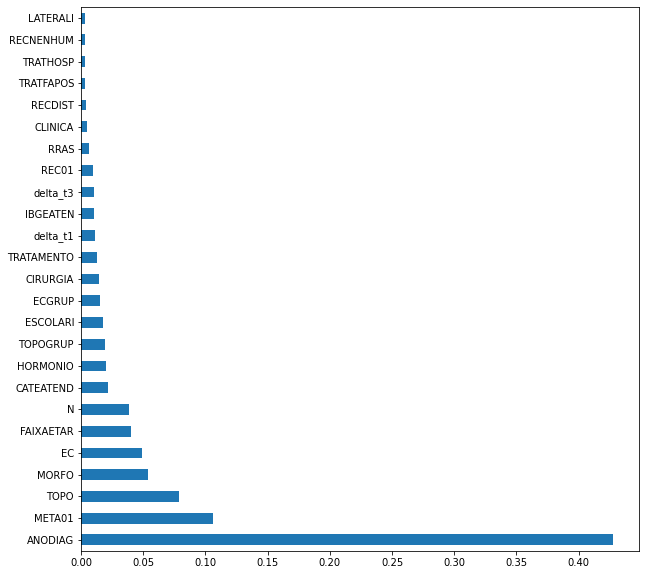

In [ ]:
plot_feat_importances(rfr_sp, X_testSP)

> The four most important features in the model were `ANODIAG`, `META01`, `TOPO` and `MORFO`.

**Other states**

In [ ]:
df = validate_regression(X_testFora_, rfr_fora, y_testFora)
df.head()

Mean Absolute Error: 666.512
Mean Squared Error: 936813.721
Root Mean Squared Error: 967.891
Score: 0.464


Real      Predict
1077    725   599.482480
15361   937  1189.573078
3301      0   149.476432
32432  3338  2186.653566
39694   649  1563.660468

> As in the model for data from São Paulo, using data from other states, it was also not possible to obtain a good performance in predicting the difference between the last information and the medical consultation. The value of R² was 0.46, the errors were lower than in the previous model, but even so they do not represent a good regressor.

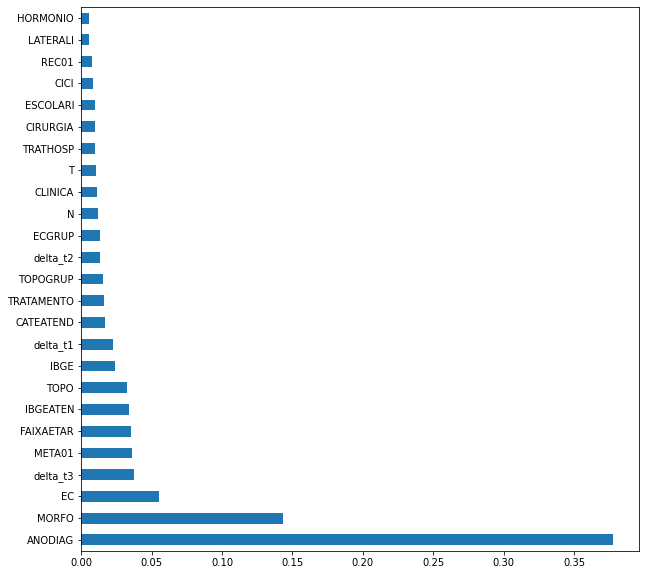

In [ ]:
plot_feat_importances(rfr_fora, X_testFora)

> The four most important features in the model were `ANODIAG`, `MORFO`, `EC` and `delta_t3`, the first one with a good difference to the others

### **XGBoost Regressor**

Here will be tested the XGBoost Regressor, for this test the `random_state` and `max_depth` hyperparameters will be used, the first one to obtain the same training values of the model every time it is runned. The `max_depth` to increase the depth of the tree in the training.

In [ ]:
# SP
xgbr_sp = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_sp.fit(X_trainSP_enc, y_trainSP)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Other states
xgbr_fora = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_fora.fit(X_trainFora_enc, y_trainFora)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Below we have the metrics for the XGBoost Regressor models, followed by the graph with the most important features for each model.

To calculate the metrics it was created a function, `validate_regression`, that returns some metrics of the model: MAE, MSE, RMSE and R².

> Go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

**SP**

In [ ]:
df = validate_regression(X_testSP_, xgbr_sp, y_testSP)
df.head()

Mean Absolute Error: 689.512
Mean Squared Error: 987826.482
Root Mean Squared Error: 993.895
Score: 0.518


Real      Predict
400744  1601  1152.513794
369215   821   524.870361
387264   607  1982.705566
296234   450   311.787750
712621   950  1346.640381

> With the XGBoost regressor, a better model for SP data was obtained in relation to the Random Forest model presented in the previous section, but the score value was 0.52.

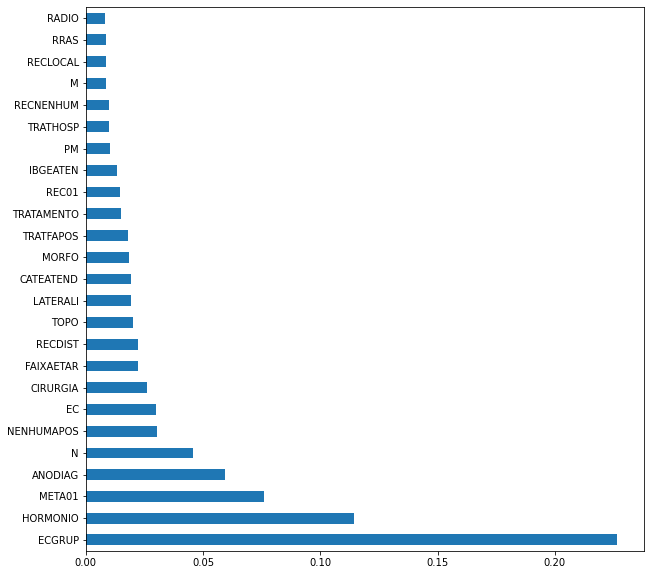

In [ ]:
plot_feat_importances(xgbr_sp, X_testSP)

> The four most important features in the model were `ECGRUP`, `HORMONIO`, `META01` and `ANODIAG`.

**Other states**

In [ ]:
df = validate_regression(X_testFora_, xgbr_fora, y_testFora)
df.head()

Mean Absolute Error: 624.762
Mean Squared Error: 874175.481
Root Mean Squared Error: 934.974
Score: 0.500


Real      Predict
1077    725   467.573486
15361   937   834.992310
3301      0    80.842232
32432  3338  2378.826904
39694   649  1536.617432

> As in the previous model, using the XGBoost regressor, a better model was obtained for data from other states in relation to the Random Forest model, with a score of 0.50, but still a model that does not present good prediction results.

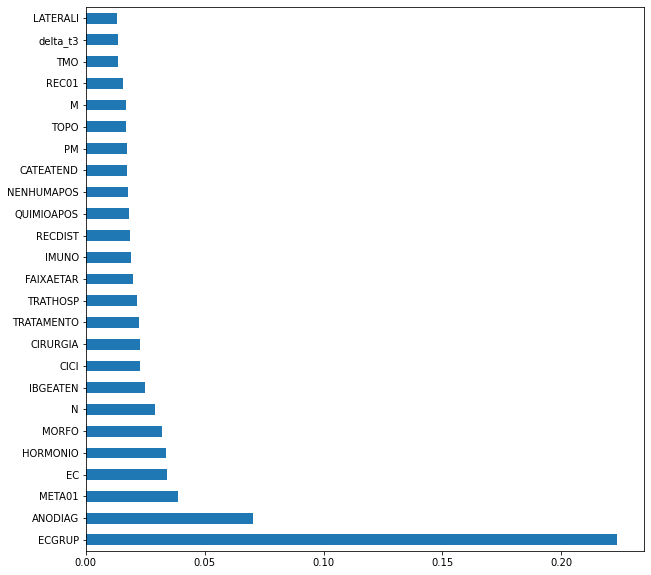

In [ ]:
plot_feat_importances(xgbr_fora, X_testFora)

> The four most important features in the model were `ECGRUP`, `ANODIAG`, `META01` and `EC`.

# **Regression - Delta t8**

Difference of days between last information and diagnosis

In this section, two machine learning models will be used to predict the `delta_t8` column, Random Forest Regressor and XGBoost Regressor.

## **Reading the data**

Reading the data from SP and other states.

We can see that we still have some missing values in both datasets, but the column `DTRECIDIVA` will be dropped, as well the `IDADE` column, because the column `FAIXAETAR` will be used, both have information about the age of the patients. 

The columns `delta_t4`, `delta_t5` and `delta_t6`, can be used as a label in a future analysis, so they will not be as features of the created models.

In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')
df_fora = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

(806402, 94)
(62317, 94)


**SP**

In [ ]:
df_SP.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    717377
delta_t6      717377
delta_t5      717377
delta_t4      717377
IDADE              1
TRATAMENTO         0
dtype: int64

**Other states**

In [ ]:
df_fora.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    57799
delta_t6      57799
delta_t5      57799
delta_t4      57799
NAOTRAT           0
LOCALTNM          0
dtype: int64

## **Training and testing split**

To define the columns that will be used as features and the label, the process will be similar to the one used previously. 

For the features we will not use some columns of the data: `UFRESID`, because we already have the division between SP and other states in the two datasets. The date columns will also be removed, `DTCONSULT, DTDIAG, DTTRAT, DTRECIDIVA, DTULTINFO`, because we already have the difference in days in other columns. 

It was chosen to keep the column `FAIXAETAR`, so we will not use the `IDADE`. Regarding `PERDASEG`, it has already been discussed in the [classification - ob section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Classifiers.html#Reading-the-data).

The columns `CONSDIAG, TRATCONS, DIAGTRAT` contain the same information as the `delta_t1, delta_t2, delta_t3`. Finally, the other columns contained in the list `list_drop` are possible labels, so they will not be used as features for machine learning models.

In [ ]:
list_drop = ['UFRESID', 'DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTRECIDIVA', 'DTULTINFO',
             'IDADE', 'PERDASEG', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'delta_t4',
             'delta_t5', 'delta_t6', 'delta_t7', 'delta_t9', 'ob', 'ano_ob', 
             'ob_com_rec', 'ob_sem_rec', 'vivo_com_rec', 'vivo_sem_rec', 'ULTINFO']
 
lb = 'delta_t8'

Again we will use the function created to perform the division of the data in training and testing, `get_train_test`. It is only necessary to pass the dataframe that will be used, a list with the columns that will not be used and a string with the name of the column that will be the label.

> To see the complete function go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models).

**SP**

In [ ]:
X_trainSP, X_testSP, y_trainSP, y_testSP = get_train_test(df_SP, list_drop, lb)

X_train = (604801, 70), X_test = (201601, 70)
y_train = (604801,), y_test = (201601,)


**Other states**

In [ ]:
X_trainFora, X_testFora, y_trainFora, y_testFora = get_train_test(df_fora, list_drop, lb)

X_train = (46737, 70), X_test = (15580, 70)
y_train = (46737,), y_test = (15580,)


## **Encoder and normalization**

After dividing the data into training and testing it is necessary to preprocess the training data, for this we will use the function `train_preprocessing`, it returns the data encoded (columns that are strings) and normalized. Training data is required for the function.

> See the complete function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models).

**SP**

In [ ]:
X_trainSP_enc, enc_SP, norm_SP = train_preprocessing(X_trainSP, normalizer='StandardScaler')

**Other states**

In [ ]:
X_trainFora_enc, enc_fora, norm_fora = train_preprocessing(X_trainFora, normalizer='StandardScaler')

## **Training and evaluation the machine learning models**

To preprocess the test data we will usa the function `test_preprocessing`, passing the test data and the encoder and normalizer, trained to the training data, as parameters.

> See the complete function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models)

In [ ]:
X_testSP_ = test_preprocessing(X_testSP, enc_SP, norm_SP)
X_testFora_ = test_preprocessing(X_testFora, enc_fora, norm_fora)

After dividing the data into training and testing, using the encoder and normalizing, the data is ready to be used by the machine learning models.

### **Random Forest Regressor**

The first model that will be tested is the Random Forest Regressor, for this test the `random_state` and `max_depth` hyperparameters will be used, the first one to obtain the same training values of the model every time it is runned. The `max_depth` to increase the depth of the tree in the training models.

In [ ]:
# SP
rfr_sp = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_sp.fit(X_trainSP_enc, y_trainSP)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
# Other states
rfr_fora = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_fora.fit(X_trainFora_enc, y_trainFora)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

Below we have the metrics for the Random Forest Regressor models, followed by the graph with the most important features for each model.

To calculate the metrics it was created a function, `validate_regression`, that returns some metrics of the model: MAE, MSE, RMSE and R².

> Go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

**SP**

In [ ]:
df = validate_regression(X_testSP_, rfr_sp, y_testSP)
df.head()

Mean Absolute Error: 782.222
Mean Squared Error: 1195702.948
Root Mean Squared Error: 1093.482
Score: 0.415


Real      Predict
400744  1601  1084.059347
369215   821   518.474025
387264   607  1377.023778
296234   433   458.217164
712621   932  1187.299115

> Using the difference in days between last information and diagnosis as label, a good predictor for SP data was also not obtained, its score was 0.41.

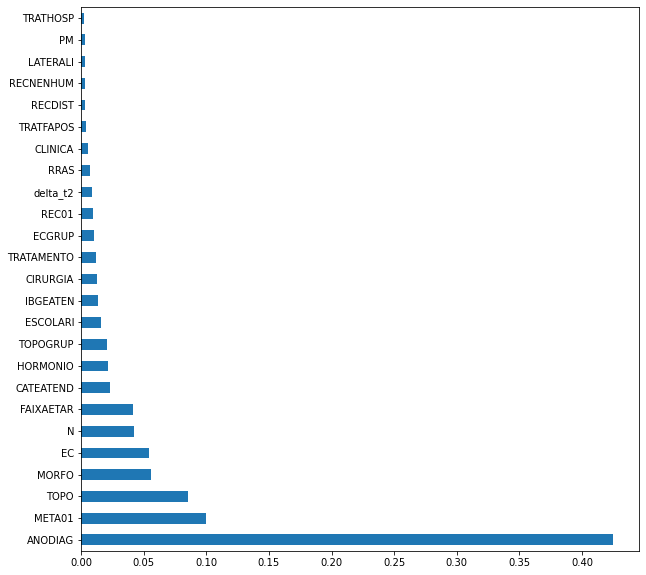

In [ ]:
plot_feat_importances(rfr_sp, X_testSP)

> The four most important features in the model were `ANODIAG`, `META01`, `TOPO` and `MORFO`.

**Other states**

In [ ]:
df = validate_regression(X_testFora_, rfr_fora, y_testFora)
df.head()

Mean Absolute Error: 663.871
Mean Squared Error: 933287.954
Root Mean Squared Error: 966.068
Score: 0.464


Real      Predict
1077    724   560.414422
15361   936  1261.124292
3301      0   186.681097
32432  3365  2201.181639
39694   663  1631.297124

> As in the model for data from São Paulo, using data from other states, it was also not possible to obtain a good performance predicting delta_t8. The value of R² was 0.46, the errors were lower than in the previous model, but even so they do not represent a good regressor.

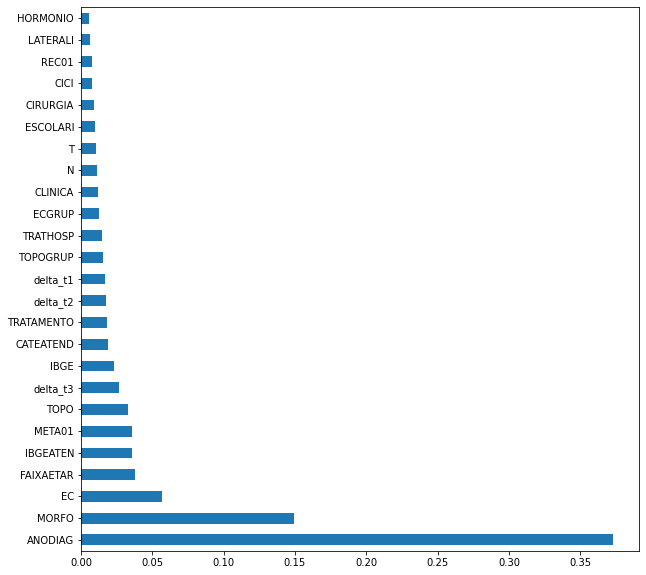

In [ ]:
plot_feat_importances(rfr_fora, X_testFora)

> The four most important features in the model were `ANODIAG`, `MORFO`, `EC` and `FAIXAETAR`.

### **XGBoost Regressor**

Here will be tested the XGBoost Regressor, for this test the `random_state` and `max_depth` hyperparameters will be used, the first one to obtain the same training values of the model every time it is runned. The `max_depth` to increase the depth of the tree in the training.

In [ ]:
# SP
xgbr_sp = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_sp.fit(X_trainSP_enc, y_trainSP)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Other states
xgbr_fora = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_fora.fit(X_trainFora_enc, y_trainFora)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Below we have the metrics for the XGBoost Regressor models, followed by the graph with the most important features for each model.

To calculate the metrics it was created a function, `validate_regression`, that returns some metrics of the model: MAE, MSE, RMSE and R².

> Go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

**SP**

In [ ]:
df = validate_regression(X_testSP_, xgbr_sp, y_testSP)
df.head()

Mean Absolute Error: 686.846
Mean Squared Error: 985000.332
Root Mean Squared Error: 992.472
Score: 0.518


Real      Predict
400744  1601  1172.890869
369215   821   598.177185
387264   607  1902.172974
296234   433   345.109161
712621   932  1261.731323

> With the XGBoost regressor, a better model for SP data was obtained in relation to the Random Forest model for the same data, but the score value was 0.52, representing a not very good predictor.

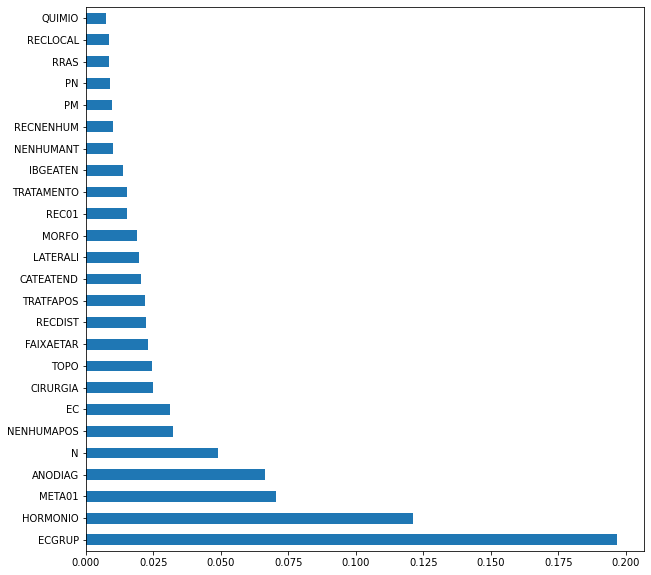

In [ ]:
plot_feat_importances(xgbr_sp, X_testSP)

> The four most important features in the model were `ECGRUP`, `HORMONIO`, `META01` and `ANODIAG`.

**Other states**

In [ ]:
df = validate_regression(X_testFora_, xgbr_fora, y_testFora)
df.head()

Mean Absolute Error: 622.798
Mean Squared Error: 870268.682
Root Mean Squared Error: 932.882
Score: 0.500


Real      Predict
1077    724   445.601044
15361   936   969.741333
3301      0    55.943726
32432  3365  2436.193848
39694   663  1578.609497

> As in the previous model, using the XGBoost regressor, a better model was obtained for data from other states in relation to the Random Forest model, with a score of 0.50, but still a model that does not present good prediction results.

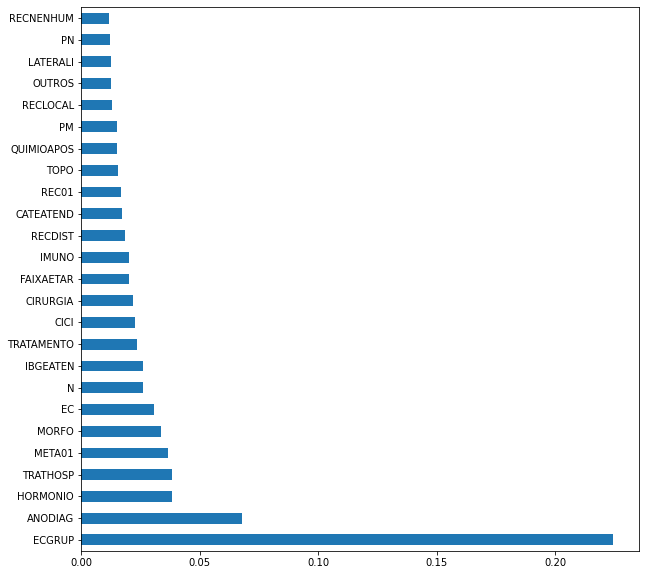

In [ ]:
plot_feat_importances(xgbr_fora, X_testFora)

> The four most important features in the model were `ECGRUP`, `ANODIAG`, `HORMONIO` and `TRATHOSP`.

# **Regression - Delta t9**

Difference of days between last information and treatment

In this section, two machine learning models will be used to predict the `delta_t9` column, Random Forest Regressor and XGBoost Regressor.

## **Reading the data**

Reading the data from SP and other states

We can see that we still have some missing values in both datasets, but the column `DTRECIDIVA` will be dropped, as well the `IDADE` column, because the column `FAIXAETAR` will be used, both have information about the age of the patients. 

The columns `delta_t4`, `delta_t5` and `delta_t6`, can be used as a label in a future analysis, so they will not be as features of the created models.

In [ ]:
df_SP = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_SP_labels.csv')
df_fora = read_csv('/content/drive/MyDrive/Trabalho/Cancer/Datasets/cancer_foraSP_labels.csv')

(806402, 94)
(62317, 94)


**SP**

In [ ]:
df_SP.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    717377
delta_t6      717377
delta_t5      717377
delta_t4      717377
IDADE              1
TRATAMENTO         0
dtype: int64

**Other states**

In [ ]:
df_fora.isna().sum().sort_values(ascending=False).head(6)

DTRECIDIVA    57799
delta_t6      57799
delta_t5      57799
delta_t4      57799
NAOTRAT           0
LOCALTNM          0
dtype: int64

## **Training and testing split**

To define the columns that will be used as features and the label, the process will be similar to the one used previously. 

For the features we will not use some columns of the data: `UFRESID`, because we already have the division between SP and other states in the two datasets. The date columns will also be removed, `DTCONSULT, DTDIAG, DTTRAT, DTRECIDIVA, DTULTINFO`, because we already have the difference in days in other columns. 

It was chosen to keep the column `FAIXAETAR`, so we will not use the `IDADE`. Regarding `PERDASEG`, it has already been discussed in the [classification - ob section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Classifiers.html#Reading-the-data).

The columns `CONSDIAG, TRATCONS, DIAGTRAT` contain the same information as the `delta_t1, delta_t2, delta_t3`. Finally, the other columns contained in the list `list_drop` are possible labels, so they will not be used as features for machine learning models.

In [ ]:
list_drop = ['UFRESID', 'DTCONSULT', 'DTDIAG', 'DTTRAT', 'DTRECIDIVA', 'DTULTINFO',
             'IDADE', 'PERDASEG', 'CONSDIAG', 'TRATCONS', 'DIAGTRAT', 'delta_t4',
             'delta_t5', 'delta_t6', 'delta_t7', 'delta_t8', 'ob', 'ano_ob', 
             'ob_com_rec', 'ob_sem_rec', 'vivo_com_rec', 'vivo_sem_rec', 'ULTINFO']
 
lb = 'delta_t9'

Again we will use the function created to perform the division of the data in training and testing, `get_train_test`. It is only necessary to pass the dataframe that will be used, a list with the columns that will not be used and a string with the name of the column that will be the label.

> To see the complete function go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models).

**SP**

In [ ]:
X_trainSP, X_testSP, y_trainSP, y_testSP = get_train_test(df_SP, list_drop, lb)

X_train = (604801, 70), X_test = (201601, 70)
y_train = (604801,), y_test = (201601,)


**Other states**

In [ ]:
X_trainFora, X_testFora, y_trainFora, y_testFora = get_train_test(df_fora, list_drop, lb)

X_train = (46737, 70), X_test = (15580, 70)
y_train = (46737,), y_test = (15580,)


## **Encoder and normalization**

After dividing the data into training and testing it is necessary to preprocess the training data, for this we will use the function `train_preprocessing`, it returns the data encoded (columns that are strings) and normalized. Training data is required for the function.

> See the complete function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models).

**SP**

In [ ]:
X_trainSP_enc, enc_SP, norm_SP = train_preprocessing(X_trainSP, normalizer='StandardScaler')

**Other states**

In [ ]:
X_trainFora_enc, enc_fora, norm_fora = train_preprocessing(X_trainFora, normalizer='StandardScaler')

## **Training and evaluation the machine learning models**

To preprocess the test data we will usa the function `test_preprocessing`, passing the test data and the encoder and normalizer, trained to the training data, as parameters.

> See the complete function in the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models)

In [ ]:
X_testSP_ = test_preprocessing(X_testSP, enc_SP, norm_SP)
X_testFora_ = test_preprocessing(X_testFora, enc_fora, norm_fora)

After dividing the data into training and testing, using the encoder and normalizing, the data is ready to be used by the machine learning models.

### **Random Forest Regressor**

The first model that will be tested is the Random Forest Regressor, for this test the `random_state` and `max_depth` hyperparameters will be used, the first one to obtain the same training values of the model every time it is runned. The `max_depth` to increase the depth of the tree in the training models.

In [ ]:
# SP
rfr_sp = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_sp.fit(X_trainSP_enc, y_trainSP)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

In [ ]:
# Other states
rfr_fora = RandomForestRegressor(random_state=seed, max_depth=10)
rfr_fora.fit(X_trainFora_enc, y_trainFora)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=10, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=10, verbose=0, warm_start=False)

Below we have the metrics for the Random Forest Regressor models, followed by the graph with the most important features for each model.

To calculate the metrics it was created a function, `validate_regression`, that returns some metrics of the model: MAE, MSE, RMSE and R².

> Go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

**SP**

In [ ]:
df = validate_regression(X_testSP_, rfr_sp, y_testSP)
df.head()

Mean Absolute Error: 786.738
Mean Squared Error: 1202646.875
Root Mean Squared Error: 1096.653
Score: 0.407


Real      Predict
400744  1601   972.655416
369215   821   498.512299
387264   607  1425.012203
296234   432   372.219595
712621   932  1047.650587

> Using the difference in days between last information and treatment as label, a predictor with R² equal to 0.41 was obtained, representing a bad model to predict the value of delta_t9.

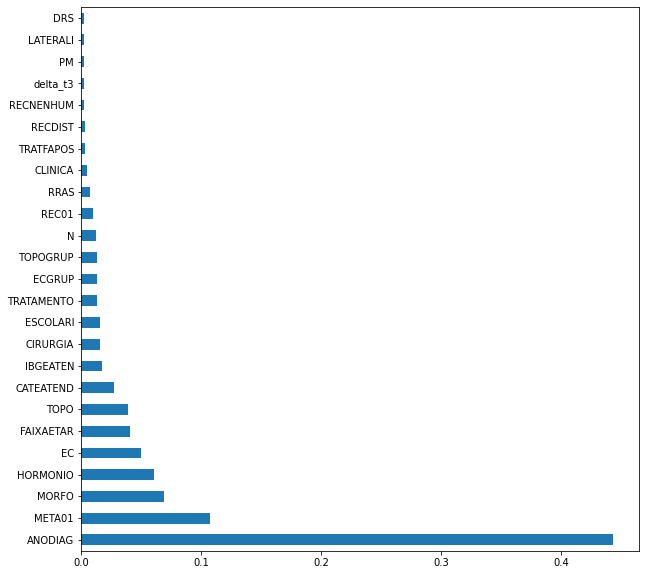

In [ ]:
plot_feat_importances(rfr_sp, X_testSP)

> The four most important features in the model were `ANODIAG`, `META01`, `MORFO` and `HORMONIO`.

**Other states**

In [ ]:
df = validate_regression(X_testFora_, rfr_fora, y_testFora)
df.head()

Mean Absolute Error: 661.286
Mean Squared Error: 930053.631
Root Mean Squared Error: 964.393
Score: 0.463


Real      Predict
1077    722   597.598551
15361   900  1160.502572
3301      0   149.705062
32432  3242  2078.646844
39694   617  1532.888781

> As in the model for data from São Paulo, using data from other states, it was also not possible to obtain a good performance predicting delta_t9. The value of R² was 0.46, similar to the other Random Forest models for other states data.

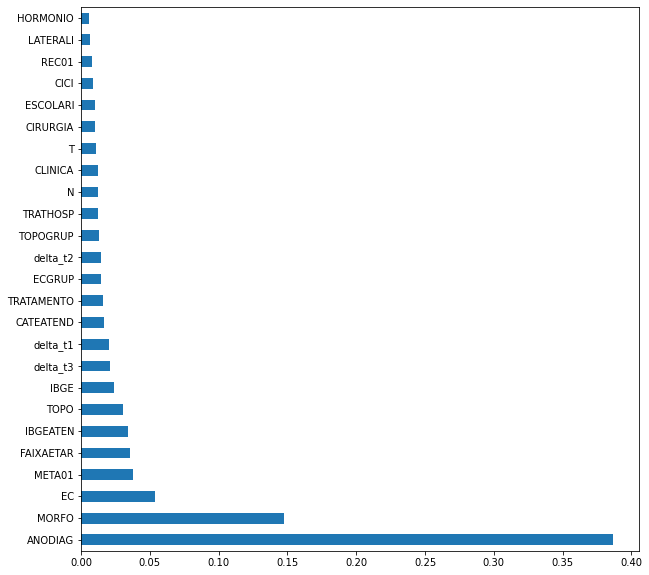

In [ ]:
plot_feat_importances(rfr_fora, X_testFora)

> The four most important features in the model were `ANODIAG`, `MORFO`, `EC` and `META01`.

### **XGBoost Regressor**

Here will be tested the XGBoost Regressor, for this test the `random_state` and `max_depth` hyperparameters will be used, the first one to obtain the same training values of the model every time it is runned. The `max_depth` to increase the depth of the tree in the training.

In [ ]:
# SP
xgbr_sp = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_sp.fit(X_trainSP_enc, y_trainSP)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

In [ ]:
# Other states
xgbr_fora = xgb.XGBRegressor(max_depth=10, random_state=seed)
xgbr_fora.fit(X_trainFora_enc, y_trainFora)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0,
             importance_type='gain', learning_rate=0.1, max_delta_step=0,
             max_depth=10, min_child_weight=1, missing=None, n_estimators=100,
             n_jobs=1, nthread=None, objective='reg:linear', random_state=10,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
             silent=None, subsample=1, verbosity=1)

Below we have the metrics for the XGBoost Regressor models, followed by the graph with the most important features for each model.

To calculate the metrics it was created a function, `validate_regression`, that returns some metrics of the model: MAE, MSE, RMSE and R².

> Go to the [functions section](https://cancer-project.readthedocs.io/en/latest/Cancer%20Libraries%20and%20functions.html#Models) to see the complete function.

**SP**

In [ ]:
df = validate_regression(X_testSP_, xgbr_sp, y_testSP)
df.head()

Mean Absolute Error: 685.819
Mean Squared Error: 983335.065
Root Mean Squared Error: 991.633
Score: 0.515


Real      Predict
400744  1601  1095.191040
369215   821   519.250488
387264   607  2122.545654
296234   432   367.914001
712621   932  1267.061646

> With the XGBoost regressor, a better model for SP data was obtained in relation to the Random Forest model for the same data, as seen to the other labels, but the score value was 0.51, representing a not very good predictor.

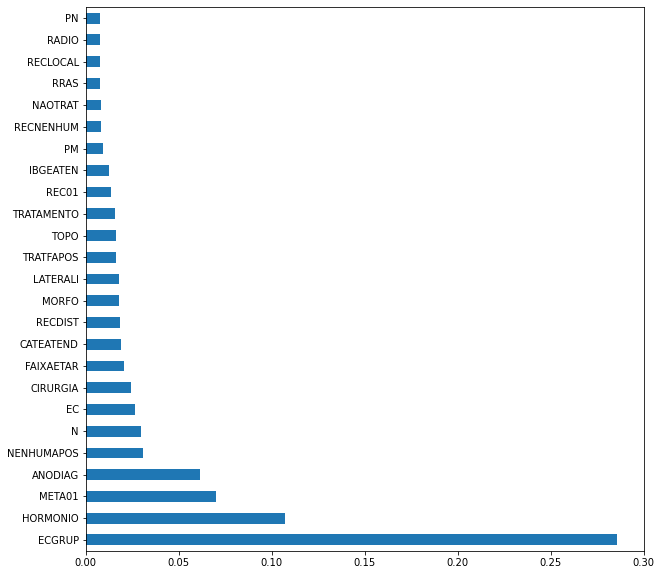

In [ ]:
plot_feat_importances(xgbr_sp, X_testSP)

> The four most important features in the model were `ECGRUP`, `HORMONIO`, `META01` and `ANODIAG`.

**Other states**

In [ ]:
df = validate_regression(X_testFora_, xgbr_fora, y_testFora)
df.head()

Mean Absolute Error: 622.998
Mean Squared Error: 871323.837
Root Mean Squared Error: 933.447
Score: 0.497


Real      Predict
1077    722   292.516296
15361   900  1164.710449
3301      0    60.525486
32432  3242  2262.347168
39694   617  1506.699829

> As in the previous model, using the XGBoost regressor, a better model was obtained for data from other states in relation to the Random Forest model, with a score of 0.50, but still a model that does not present good prediction results.

> None of the tested regressors showed good results, so to obtain good predictions for these cases, other methods should be sought.

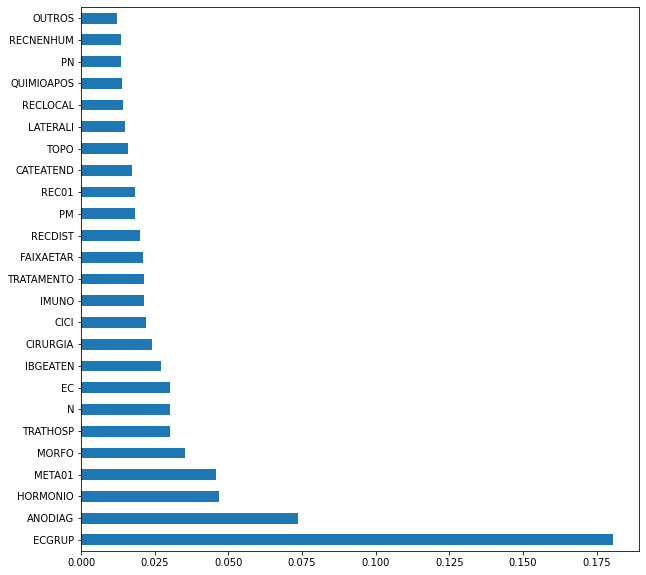

In [ ]:
plot_feat_importances(xgbr_fora, X_testFora)

> The four most important features in the model were `ECGRUP`, `ANODIAG`, `HORMONIO` and `META01`.